## Random Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.727442,1.274310,-0.998899,0.637858,1.406980,0
1,-2.790974,-0.613101,0.490713,-1.376946,0.320617,1
2,-1.801153,-1.646600,0.011300,-1.875806,-0.105444,1
3,-1.182179,-1.572309,-0.387636,-1.356795,-0.924630,1
4,-3.766258,-1.829684,1.086095,-0.491375,-1.084594,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [9]:
import random
df1 = combined_sampling(df,0.5,0.5)

C:\Users\uzebk\AppData\Local\Temp\ipykernel_19664\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\uzebk\AppData\Local\Temp\ipykernel_19664\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\uzebk\AppData\Local\Temp\ipykernel_19664\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [13]:
df3

,col2,col3,target
65,0.346602,-0.593190,1
87,-2.951663,-0.016284,1
26,0.212024,-1.406882,0
82,2.208291,-3.496199,1
27,-0.965511,-2.294111,1
92,2.444302,-1.881008,0
0,1.274310,-0.998899,0
84,-1.318554,0.442943,0
81,-2.347411,0.063966,1
65,0.346602,-0.593190,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
from sklearn.tree import plot_tree

[Text(0.36363636363636365, 0.9444444444444444, 'x[1] <= -0.755\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2727272727272727, 0.8333333333333334, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.3181818181818182, 0.8888888888888888, 'True  '),
 Text(0.45454545454545453, 0.8333333333333334, 'x[0] <= -1.889\ngini = 0.415\nsamples = 34\nvalue = [24, 10]'),
 Text(0.40909090909090906, 0.8888888888888888, '  False'),
 Text(0.18181818181818182, 0.7222222222222222, 'x[1] <= 1.042\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.09090909090909091, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2727272727272727, 0.6111111111111112, 'x[0] <= -2.67\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7272727272727273, 0.7222222222222222, 'x[1] <= 0.05\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Tex

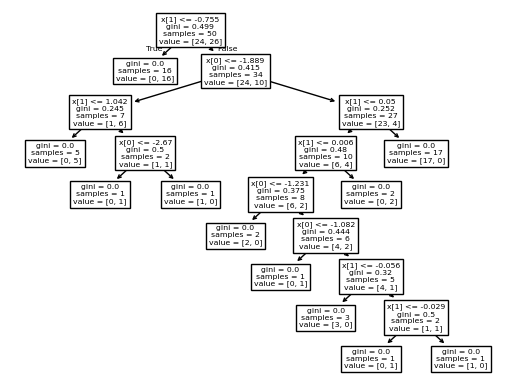

In [17]:
plot_tree(clf1)

[Text(0.6363636363636364, 0.9166666666666666, 'x[1] <= 1.665\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5454545454545454, 0.75, 'x[1] <= -1.223\ngini = 0.491\nsamples = 44\nvalue = [19.0, 25.0]'),
 Text(0.5909090909090908, 0.8333333333333333, 'True  '),
 Text(0.2727272727272727, 0.5833333333333334, 'x[0] <= -0.363\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[0] <= -1.169\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2727272727272727, 0.25, 'x[0] <= -1.108\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8181818181818182, 0.5833333333333334, 'x[0] <= -0.367\ngini 

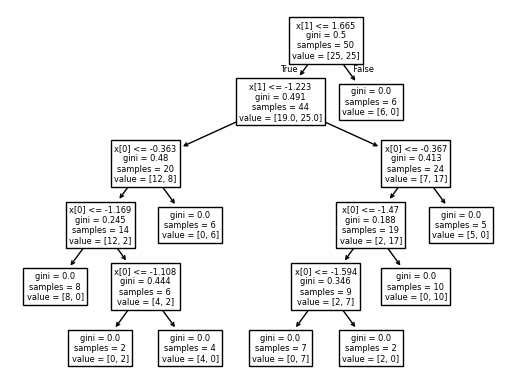

In [18]:
plot_tree(clf2)

[Text(0.4861111111111111, 0.9285714285714286, 'x[0] <= 0.005\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2222222222222222, 0.7857142857142857, 'x[1] <= 1.289\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.35416666666666663, 0.8571428571428572, 'True  '),
 Text(0.16666666666666666, 0.6428571428571429, 'x[1] <= -0.39\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= -0.074\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[0] <= -0.298\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= -1.483\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.2777777777777778, 0.21428571428

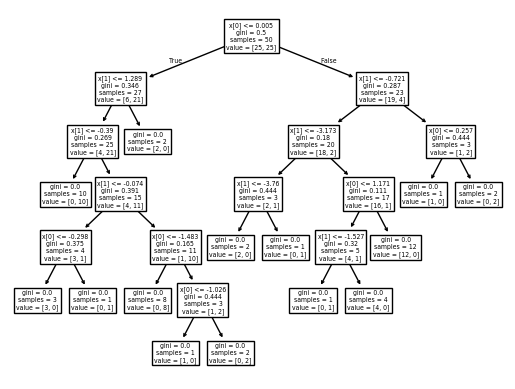

In [19]:
plot_tree(clf3)

In [20]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
49,0.632673,-1.959815,-2.341137,-2.177587,-0.277952,1
70,0.380633,-2.186045,0.961489,-0.880624,-2.670875,0
68,0.943069,2.391886,-1.708350,1.194435,3.060168,0
52,-1.119220,0.637974,-3.522581,2.231873,-3.444133,1
10,-1.575588,0.611382,-0.896051,0.039031,-1.197373,1
17,0.177326,-3.264776,-0.666113,-2.308395,-1.157558,1
53,1.812470,2.293637,-0.836902,0.746842,3.388564,0
35,1.368219,1.808971,-1.815686,-1.544070,-0.240983,0
59,0.136996,-0.209777,-2.081642,0.172254,-2.567935,1
32,1.160908,-0.657624,-0.352443,-2.107410,-2.345789,0
